<a href="https://colab.research.google.com/github/alawrence30/Visualization-Challenge-2022/blob/main/Visualization_Contest_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

os.getcwd()
%cd /content/gdrive/My Drive/Visualization Challenge 2022/
!pwd
!ls

work_dir = "/content/gdrive/My Drive/Visualization Challenge 2022/"

df = pd.read_csv(work_dir + 'Towed_Vehicles.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Visualization Challenge 2022
/content/gdrive/My Drive/Visualization Challenge 2022
 Burst_make.png      'Visualization Challenge 2022 - FINAL'   Waffle_make.png
 Donut_color.png      VOID
 Towed_Vehicles.csv   Waffle_color.png


In [10]:
# View dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tow Date            2709 non-null   object
 1   Make                2685 non-null   object
 2   Style               2694 non-null   object
 3   Model               140 non-null    object
 4   Color               2693 non-null   object
 5   Plate               2287 non-null   object
 6   State               2600 non-null   object
 7   Towed to Address    2709 non-null   object
 8   Tow Facility Phone  2708 non-null   object
 9   Inventory Number    2709 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 211.8+ KB


In [11]:
df.head()

,Tow Date,Make,Style,Model,Color,Plate,State,Towed to Address,Tow Facility Phone,Inventory Number
0,03/11/2022,MITS,LL,NaN,RED,BC96112,IL,400 E. Lower Wacker,(312) 744-7550,254244
1,01/03/2022,VOLV,LL,TK,GRY,RU5898,IL,701 N. Sacramento,(773) 265-7605,7021002
2,03/03/2022,BUIC,LL,NaN,BLK,CC781,IN,701 N. Sacramento,(773) 265-7605,7025888
3,03/12/2022,TOYT,4D,NaN,WHI,858AA010,IL,701 N. Sacramento,(773) 265-7605,7026600
4,03/02/2022,GMC,LL,NaN,WHI,NaN,IL,10300 S. Doty,(773) 568-8495,2929222


In [12]:
# Drop null color, make, and state values
df = df[df['Color'].notna()]
df = df[df['Make'].notna()]
df = df[df['State'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567 entries, 0 to 2708
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tow Date            2567 non-null   object
 1   Make                2567 non-null   object
 2   Style               2560 non-null   object
 3   Model               126 non-null    object
 4   Color               2567 non-null   object
 5   Plate               2272 non-null   object
 6   State               2567 non-null   object
 7   Towed to Address    2567 non-null   object
 8   Tow Facility Phone  2566 non-null   object
 9   Inventory Number    2567 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 220.6+ KB


In [13]:
# View color values 
print(df['Color'].value_counts())

BLK    583
GRY    454
WHI    379
SIL    377
BLU    203
RED    176
TAN    100
MAR     75
GRN     59
GLD     33
BGE     31
DBL     30
BRO     17
LBL     13
BRZ      6
YEL      6
ONG      6
LGR      4
CRM      4
PLE      4
TRQ      3
DGR      3
LAV      1
Name: Color, dtype: int64


In [14]:
# Rename color values
df['Color'] = df['Color'].str.replace('BLK','Black')
df['Color'] = df['Color'].str.replace('GRY','Gray')
df['Color'] = df['Color'].str.replace('WHI','White')
df['Color'] = df['Color'].str.replace('SIL','Silver')
df['Color'] = df['Color'].str.replace('BLU','Blue')
df['Color'] = df['Color'].str.replace('RED','Red')
df['Color'] = df['Color'].str.replace('TAN','Tan')
df['Color'] = df['Color'].str.replace('MAR','Maroon')
df['Color'] = df['Color'].str.replace('GRN','Green')
df['Color'] = df['Color'].str.replace('DBL','Dark Blue')
df['Color'] = df['Color'].str.replace('BGE','Beige')
df['Color'] = df['Color'].str.replace('GLD','Gold')
df['Color'] = df['Color'].str.replace('BRO','Brown')
df['Color'] = df['Color'].str.replace('LBL','Light Blue')
df['Color'] = df['Color'].str.replace('BRZ','Bronze')
df['Color'] = df['Color'].str.replace('ONG','Orange')
df['Color'] = df['Color'].str.replace('LGR','Light Green')
df['Color'] = df['Color'].str.replace('YEL','Yellow')
df['Color'] = df['Color'].str.replace('PLE','Purple')
df['Color'] = df['Color'].str.replace('CRM','Cream')
df['Color'] = df['Color'].str.replace('DGR','Dark Green')
df['Color'] = df['Color'].str.replace('TRQ','Turquoise')
df['Color'] = df['Color'].str.replace('LAV','Lavender')

print(df['Color'].value_counts())

Black          583
Gray           454
White          379
Silver         377
Blue           203
Red            176
Tan            100
Maroon          75
Green           59
Gold            33
Beige           31
Dark Blue       30
Brown           17
Light Blue      13
Bronze           6
Yellow           6
Orange           6
Light Green      4
Cream            4
Purple           4
Turquoise        3
Dark Green       3
Lavender         1
Name: Color, dtype: int64


In [15]:
# View 20 most frequent mdoel values 
df['Make'].value_counts()[:20].sort_values(ascending = False)

CHEV    369
FORD    258
NISS    221
TOYT    188
HOND    172
JEEP    148
DODG    131
HYUN    116
KIA      76
BUIC     73
CHRY     72
VOLK     66
GMC      64
BMW      58
PONT     49
INFI     46
MAZD     44
LEXS     42
MERC     41
ACUR     39
Name: Make, dtype: int64

In [16]:
# Narrow make with a frequency greater or equal to 39
df['Make Frequency'] = df['Make'].map(df['Make'].value_counts())
df = df[df['Make Frequency'] >= 39]

df.sort_values(by = ['Make Frequency'], ascending = False)

,Tow Date,Make,Style,Model,Color,Plate,State,Towed to Address,Tow Facility Phone,Inventory Number,Make Frequency
1854,02/22/2022,CHEV,4D,PRI,Green,CQ46181,IL,10300 S. Doty,(773) 568-8495,2928740,369
2552,02/16/2022,CHEV,PK,NaN,Blue,DKG999,MN,10300 S. Doty,(773) 785-9752,1722912,369
780,01/09/2022,CHEV,LL,NaN,Black,I1I11I1,GA,701 N. Sacramento,(773) 265-7605,7021490,369
782,03/10/2022,CHEV,4D,NaN,Silver,DF73607,IL,701 N. Sacramento,(773) 265-1846,1543393,369
787,03/08/2022,CHEV,4D,NaN,Gray,CS73807,IL,400 E. Lower Wacker,(312) 744-7550,254041,369
...,...,...,...,...,...,...,...,...,...,...,...
66,01/22/2022,ACUR,4D,NaN,Blue,AS83530,IL,701 N. Sacramento,(773) 265-7605,7022511,39
1958,03/11/2022,ACUR,4D,NaN,Gray,CJ37061,IL,10300 S. Doty,(773) 568-8495,7026571,39
2628,12/30/2021,ACUR,4D,NaN,Black,CF70659,IL,400 E. Lower Wacker,(312) 744-7550,250502,39
2486,02/13/2022,ACUR,4D,NaN,Gray,CK51541,IL,400 E. Lower Wacker,(312) 744-7550,252722,39


In [17]:
df['Make'].value_counts()

CHEV    369
FORD    258
NISS    221
TOYT    188
HOND    172
JEEP    148
DODG    131
HYUN    116
KIA      76
BUIC     73
CHRY     72
VOLK     66
GMC      64
BMW      58
PONT     49
INFI     46
MAZD     44
LEXS     42
MERC     41
ACUR     39
Name: Make, dtype: int64

In [18]:
# Rename make values
df['Make'] = df['Make'].str.replace('CHEV','Chevy')
df['Make'] = df['Make'].str.replace('FORD','Ford')
df['Make'] = df['Make'].str.replace('NISS','Nissan')
df['Make'] = df['Make'].str.replace('TOYT','Toyota')
df['Make'] = df['Make'].str.replace('HOND','Honda')
df['Make'] = df['Make'].str.replace('JEEP','Jeep')
df['Make'] = df['Make'].str.replace('DODG','Dodge')
df['Make'] = df['Make'].str.replace('HYUN','Hyundai')
df['Make'] = df['Make'].str.replace('KIA','Kia')
df['Make'] = df['Make'].str.replace('BUIC','Buick')
df['Make'] = df['Make'].str.replace('CHRY','Chrystler')
df['Make'] = df['Make'].str.replace('VOLK','Volkswagon')
df['Make'] = df['Make'].str.replace('PONT','Pontiac')
df['Make'] = df['Make'].str.replace('INFI','Infiniti')
df['Make'] = df['Make'].str.replace('MAZD','Mazda')
df['Make'] = df['Make'].str.replace('LEXS','Lexus')
df['Make'] = df['Make'].str.replace('MERC','Mercedes')
df['Make'] = df['Make'].str.replace('ACUR','Acura')

df['Make'].value_counts()[:20].sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Chevy         369
Ford          258
Nissan        221
Toyota        188
Honda         172
Jeep          148
Dodge         131
Hyundai       116
Kia            76
Buick          73
Chrystler      72
Volkswagon     66
GMC            64
BMW            58
Pontiac        49
Infiniti       46
Mazda          44
Lexus          42
Mercedes       41
Acura          39
Name: Make, dtype: int64

In [19]:
# View 20 most frequent state values 
df['State'].value_counts()[:20].sort_values(ascending = False)

IL    2025
IN      57
TX      35
WI      31
FL      17
MI      11
IA      10
AZ       8
GA       8
MN       7
MO       7
OH       6
CA       5
TN       5
AL       4
CO       4
MS       3
NJ       3
PA       3
MD       2
Name: State, dtype: int64

In [20]:
# Narrow state with a frequency greater or equal to 2
df['State Frequency'] = df['State'].map(df['State'].value_counts())
df = df[df['State Frequency'] >= 2]

df.sort_values(by = ['State Frequency'], ascending = False)

,Tow Date,Make,Style,Model,Color,Plate,State,Towed to Address,Tow Facility Phone,Inventory Number,Make Frequency,State Frequency
1372,02/23/2022,Kia,LL,NaN,White,CA88852,IL,10300 S. Doty,(773) 568-8495,2928785,76,2025
1779,02/16/2022,Ford,4T,NaN,Blue,AA98938,IL,701 N. Sacramento,(773) 265-7605,7024444,258,2025
1799,02/11/2022,Dodge,4D,NaN,White,CB13095,IL,10300 S. Doty,(773) 568-8495,2928239,131,2025
1797,02/16/2022,Jeep,LL,NaN,Black,S247717,IL,701 N. Sacramento,(773) 265-7605,7024445,148,2025
1796,02/04/2022,Dodge,VN,NaN,Light Blue,NaN,IL,10300 S. Doty,(773) 568-8495,2927755,131,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,02/15/2022,Chevy,LL,TAH,Black,9DR8828,MD,10300 S. Doty,(773) 568-8495,2928441,369,2
2283,02/19/2022,Ford,4D,NaN,White,830RJJ,AR,10300 S. Doty,(773) 568-8495,2928600,258,2
984,01/09/2022,Dodge,4D,NaN,Black,UDX9779,VA,701 N. Sacramento,(773) 265-7605,7021498,131,2
768,03/08/2022,Ford,4D,NaN,Blue,JCK5504,NC,400 E. Lower Wacker,(312) 744-7550,254043,258,2


In [21]:
df['State'].value_counts()

IL    2025
IN      57
TX      35
WI      31
FL      17
MI      11
IA      10
GA       8
AZ       8
MO       7
MN       7
OH       6
TN       5
CA       5
CO       4
AL       4
PA       3
NJ       3
MS       3
OK       2
NC       2
VA       2
KY       2
MD       2
AR       2
Name: State, dtype: int64

In [22]:
# Rename state values
df['State'] = df['State'].str.replace('IL','Illinois')
df['State'] = df['State'].str.replace('IN','Indiana')
df['State'] = df['State'].str.replace('TX','Texas')
df['State'] = df['State'].str.replace('WI','Wisconsin')
df['State'] = df['State'].str.replace('FL','Florida')
df['State'] = df['State'].str.replace('MI','Michigan')
df['State'] = df['State'].str.replace('IA','Iowa')
df['State'] = df['State'].str.replace('GA','Georgia')
df['State'] = df['State'].str.replace('AZ','Arizona')
df['State'] = df['State'].str.replace('MO','Missouri')
df['State'] = df['State'].str.replace('MN','Minnesota')
df['State'] = df['State'].str.replace('OH','Ohio')
df['State'] = df['State'].str.replace('TN','Tennessee')
df['State'] = df['State'].str.replace('CA','California')
df['State'] = df['State'].str.replace('CO','Colorado')
df['State'] = df['State'].str.replace('AL','Alabama')
df['State'] = df['State'].str.replace('PA','Pennsylvania')
df['State'] = df['State'].str.replace('NJ','New Jersey')
df['State'] = df['State'].str.replace('MS','Mississippi')
df['State'] = df['State'].str.replace('OK','Oklahoma')
df['State'] = df['State'].str.replace('NC','North Carolina')
df['State'] = df['State'].str.replace('VA','Virginia')
df['State'] = df['State'].str.replace('KY','Kentucky')
df['State'] = df['State'].str.replace('MD','Maryland')
df['State'] = df['State'].str.replace('AR','Arkansas')

df['State'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Illinois          2025
Indiana             57
Texas               35
Wisconsin           31
Florida             17
Michigan            11
Iowa                10
Georgia              8
Arizona              8
Missouri             7
Minnesota            7
Ohio                 6
Tennessee            5
California           5
Colorado             4
Alabama              4
Pennsylvania         3
New Jersey           3
Mississippi          3
Oklahoma             2
North Carolina       2
Virginia             2
Kentucky             2
Maryland             2
Arkansas             2
Name: State, dtype: int64

In [23]:
pip install pywaffle

     |████████████████████████████████| 565 kB 5.0 MB/s 


In [24]:
# Install PyWaffle
from pywaffle import Waffle

In [25]:
# Organize color data
df_color = df.groupby('Color').size().reset_index(name = 'counts_color')
n_categories = df_color.shape[0]
colors_color = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]
df_color.head()

,Color,counts_color
0,Beige,27
1,Black,512
2,Blue,175
3,Bronze,5
4,Brown,14


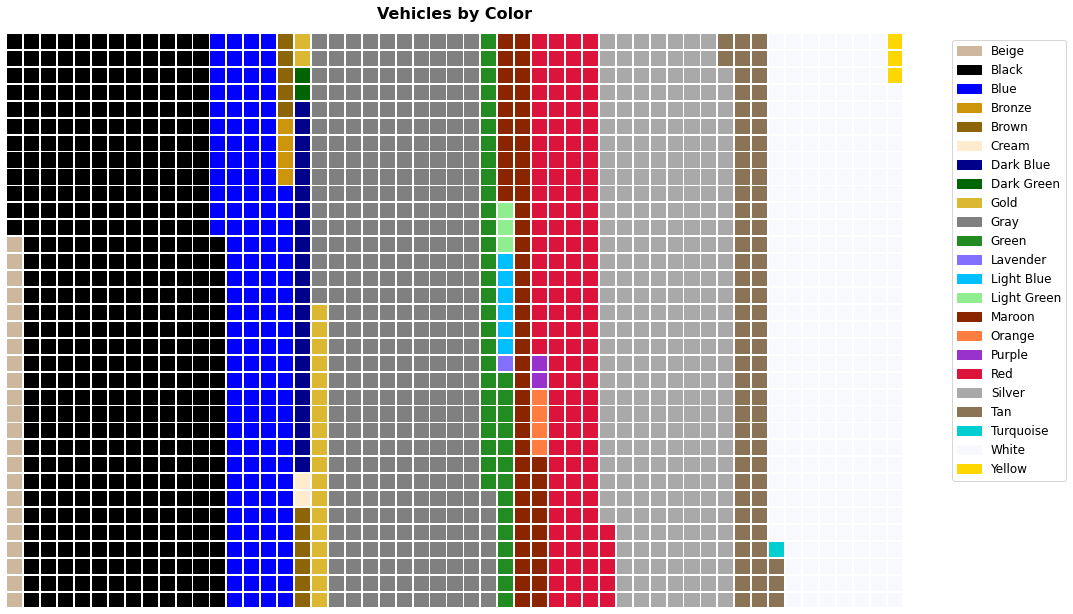

In [39]:
# Plot color data - waffle chart
fig = plt.figure(
    FigureClass = Waffle,
    plots = {
        '313': {
            'values': df_color['counts_color'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_color[['Color', 'counts_color']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Vehicles by Color', 'loc': 'center', 'fontsize':16, 'pad':15, 'fontweight':'bold'},
            'colors':["#CDB79E", "#000000", "#0000FF","#CD950C", "#8B6508", "#FFEBCD",
                     "#00008B", "#006400", "#DCB732","#808080", "#228B22", "#8470FF",
                     "#00BFFF", "#90EE90", "#8B2500","#FF7D40", "#9932CC", "#DC143C",
                     "#A9A9A9", "#8B7355", "#00CED1","#F8F8FF", "#FFD700"],
        }
    },
    rows = 34,
    columns = 53,
    figsize=(15, 29)
)

plt.savefig('Waffle_color.png')

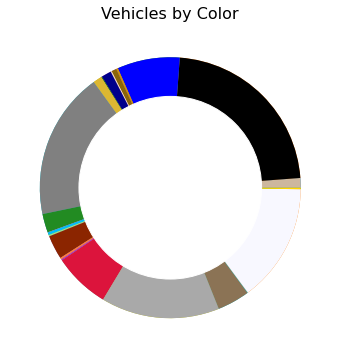

<Figure size 432x288 with 0 Axes>

In [40]:
# Plot color data - donut chart
plt.figure(figsize=(6,6))
plt.pie(df_color['counts_color'])
plt.pie(df_color['counts_color'], colors = ["#CDB79E", "#000000", "#0000FF","#CD950C", "#8B6508", "#FFEBCD",
                     "#00008B", "#006400", "#DCB732","#808080", "#228B22", "#8470FF",
                     "#00BFFF", "#90EE90", "#8B2500","#FF7D40", "#9932CC", "#DC143C",
                     "#A9A9A9", "#8B7355", "#00CED1","#F8F8FF", "#FFD700"])
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.title('Vehicles by Color', size = 16)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

plt.savefig('Donut_color.png')

In [28]:
# Organize make data
df_make = df.groupby('Make').size().reset_index(name = 'counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]
df_make.head()

,Make,counts_make
0,Acura,39
1,BMW,58
2,Buick,73
3,Chevy,368
4,Chrystler,70


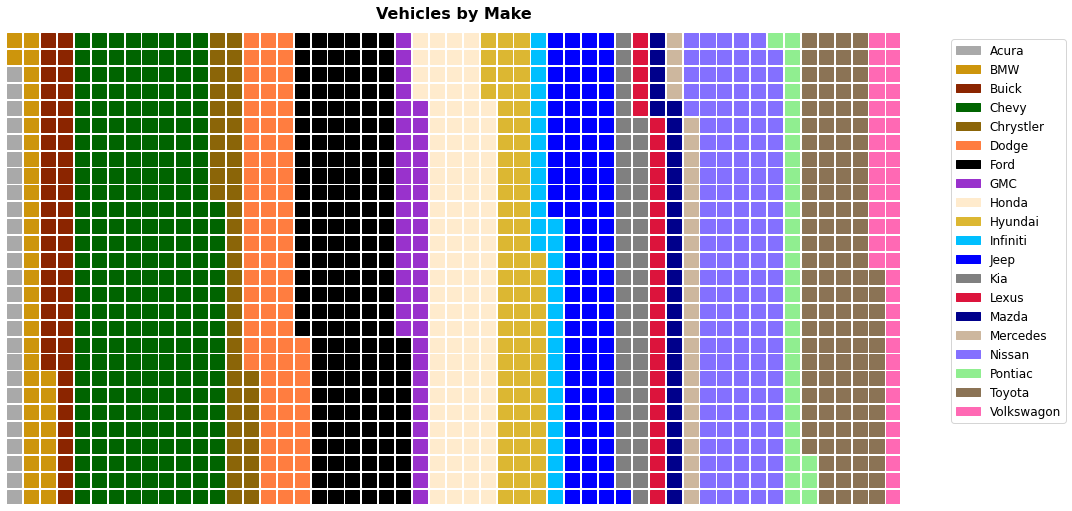

In [29]:
# Plot make data - waffle chart
fig = plt.figure(
    FigureClass = Waffle,
    plots = {
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['Make', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Vehicles by Make', 'loc': 'center', 'fontsize':16, 'pad':15, 'fontweight':'bold'},
            'colors':["#A9A9A9", "#CD950C", "#8B2500", "#006400", "#8B6508", "#FF7D40", "#000000", "#9932CC", 
                      "#FFEBCD", "#DCB732", "#00BFFF", "#0000FF", "#808080", "#DC143C", "#00008B", "#CDB79E",
                      "#8470FF", "#90EE90", "#8B7355","#FF69B4"],
        }
    },
    rows = 28,
    columns = 53,
    figsize=(15, 29)
)

plt.savefig('Waffle_make.png')

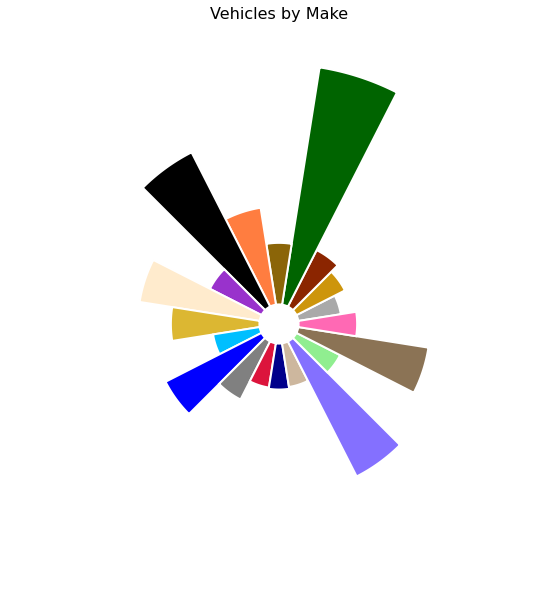

In [30]:
# Plot make data - circular bar plot

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')
plt.title("Vehicles by Make", size = 16)
upperLimit = 100
lowerLimit = 30
max = df_make['counts_make'].max()
slope = (max - lowerLimit) / max
heights = slope * df_make.counts_make + lowerLimit
width = 2*np.pi / len(df_make.index)
indexes = list(range(1, len(df_make.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    color=["#A9A9A9", "#CD950C", "#8B2500", "#006400", "#8B6508", "#FF7D40", "#000000", "#9932CC", 
                      "#FFEBCD", "#DCB732", "#00BFFF", "#0000FF", "#808080", "#DC143C", "#00008B", "#CDB79E",
                      "#8470FF", "#90EE90", "#8B7355","#FF69B4"],
    edgecolor="white")

plt.savefig('Burst_make.png')